In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
from sklearn.model_selection import LeaveOneOut
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')

In [3]:
loo = LeaveOneOut()

In [4]:
X = data[['MPG.city','MPG.highway','EngineSize','Horsepower','RPM','Rev.per.mile','Fuel.tank.capacity','Passengers','Length','Wheelbase','Width','Turn.circle','Weight']]
Xcopy = X
Y = data['Price'].values.reshape(-1,1)

In [5]:
alphas = np.logspace(0.8, 1.1, num=100)
errors = np.zeros(len(alphas))
j = 0

for i in alphas:
    clf = sklearn.linear_model.Lasso(alpha=i)
    
    err = 0
    for traini, testi in loo.split(X):
        Xtrain, Xtest = X.iloc[traini], X.iloc[testi]
        Ytrain, Ytest = Y[traini], Y[testi]
        clf.fit(Xtrain,Ytrain)
        Yinter = clf.intercept_ + clf.coef_[0]*Xtest.iloc[0,0] + clf.coef_[1]*Xtest.iloc[0,1] + clf.coef_[2]*Xtest.iloc[0,2] + clf.coef_[3]*Xtest.iloc[0,3] + clf.coef_[4]*Xtest.iloc[0,4] + clf.coef_[5]*Xtest.iloc[0,5] + clf.coef_[6]*Xtest.iloc[0,6] + clf.coef_[7]*Xtest.iloc[0,7] + clf.coef_[8]*Xtest.iloc[0,8] + clf.coef_[9]*Xtest.iloc[0,9] + clf.coef_[10]*Xtest.iloc[0,10] + clf.coef_[11]*Xtest.iloc[0,11] + clf.coef_[12]*Xtest.iloc[0,12]
        err += (Ytest - Yinter)**2
    err = err/len(X)
    errors[j] = err
    j += 1
    
    clf.fit(Xcopy,Y)
    
    print('Alpha =', i)
    print('     Intercept =', clf.intercept_)
    print('     Coefficients =', clf.coef_)
    print('     Error =', err, '\n')

Alpha = 6.309573444801933
     Intercept = [-20.98640581]
     Coefficients = [-0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.25921236e-01
 -4.58549592e-05  3.67537422e-03 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.57401626e-03]
     Error = [[36.14823794]] 

Alpha = 6.353752638084486
     Intercept = [-20.99761169]
     Coefficients = [-0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.25857142e-01
 -4.28029997e-05  3.67247464e-03 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.57761890e-03]
     Error = [[36.14758567]] 

Alpha = 6.398241170997707
     Intercept = [-21.00889603]
     Coefficients = [-0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.25792598e-01
 -3.97296705e-05  3.66955475e-03 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.58124676e-03]
     Error = [[36.14701212]] 

Alpha = 6.44304120951612
     Inte

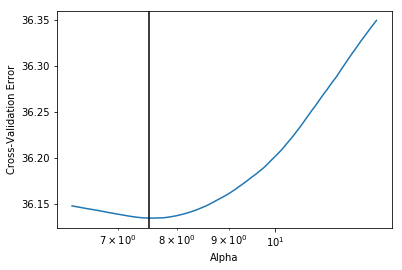

In [6]:
plt.semilogx(alphas, errors)
plt.xlabel('Alpha')
m = np.argmin(errors)
v = alphas[m]
plt.axvline(x=v, color='k')
_ = plt.ylabel('Cross-Validation Error')